# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 0. Clean Up the Zombie Processes
At the end of this notebook, when you execute `env.close()`, it does not clean up the environment completely. Instead, the Unity environment process becomes a "zombie" process. A zombie process is one that has completed execution but still has an entry in the process table because its parent process hasn’t properly reaped it.
You can yourself verify this by running these commands in the terminal. Find the parent process ID (PPID) of the zombie process:
```bash
ps -o pid,ppid,stat,cmd | grep Reacher
```
If the parent process (PPID) is not 1, kill it to clean up the zombie process:
```bash
kill -9 <PPID>
```
Below is the equivalent Python code that checks for and cleans zombie processes using `psutil`. **You need run the cell below only when you restart the Unity environment.** 

> **NOTE**: The code cell below will also kill the Kernel. You should restart it when required.

In [1]:
import psutil

def cleanup_zombie_processes():
    for proc in psutil.process_iter(['pid', 'ppid', 'name', 'status']):
        if proc.info['name'] == 'Reacher_One_Lin' and proc.info['status'] == 'zombie':
            print(f"Zombie process detected: {proc.info}")
            parent = psutil.Process(proc.info['ppid'])
            print(f"Terminating parent process: {parent}")
            parent.terminate()

cleanup_zombie_processes()

In [ ]:
#!/opt/conda/bin/python3 -m pip install ipykernel
#!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
#!pip uninstall -y torch torchvision torchaudio
#!rm -rf ~/.local/lib/python3.11/site-packages/torch*

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install .

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
#for CPU
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch==2.0.1 from https://files.pythonhosted.org/packages/c8/21/25020cfdd9f564a72f400ee491610e50cb212e8add8031abaa959af6451e/torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torchvision==0.15.2 from https://files.pythonhosted.org/packages/4b/62/b6ec55347600b02b0a2a6596e673c69424aea7360c48343653866e66aa0d/torchvision-0.15.2-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torchaudio==2.0.2 from https://files.pythonhosted.org/packages/d3/0f/59080659989bc9df844dc706d1f8369ba3e17e8f143cdeac9fed83481301/torchaudio-2.0.2-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/4d/36/2a115987e2d8c300a974597416d9de88f2444426de9571f4b59b2cca3acc/filelock-3.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for 

  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 62.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 65.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 48.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.3 MB/s eta 0:00:00:00:010

In [3]:
#For GPU
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 574.2 kB/s eta 0:00:000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 71.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 79.8 MB/s eta 0:00:00:00:01
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/4d/36/2a115987e2d8c300a974597416d9de88f2444426de9571f4b59b2cca3acc/filelock-3.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/eb/8d/776adee7bbf76365fdd7f2552710282c79a4ead5d2a46408c9043a2b70ba/networkx-3.5-py3-none-any.whl.

In [4]:
import sys
import os
sys.path.append(os.path.expanduser('~/.local/lib/python3.11/site-packages'))

In [5]:
import torch
print(torch.__version__)

2.0.1+cu118


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [6]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /data/Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/data/Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/data/Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies
PlayerPrefs - Creating folder: /home/student/.config/unity3d/Unity Technologies/Unity Environment
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [9]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.11649999739602208


In [14]:
from model import Actor, Critic
from ddpg_agent import Agent
agent = Agent(state_size = state_size, action_size = action_size, random_seed = 0)

print("Actor Model:\n", agent.actor_local)
print("\nCritic Model:\n", agent.critic_local)

Actor Model:
 Actor(
  (fc1): Linear(in_features=33, out_features=300, bias=True)
  (ln1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=300, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
)

Critic Model:
 Critic(
  (fcs1): Linear(in_features=33, out_features=300, bias=True)
  (ln1): LayerNorm((300,), eps=1e-05, elementwise_affine=True)
  (fc2): Linear(in_features=304, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=1, bias=True)
)


In [15]:
import torch
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TARGET_SCORE = 30.0

def ddpg(env, agent, n_episodes=500, max_t=1000, print_every=20):
    scores_deque = deque(maxlen=print_every)
    scores = []
    avg_scores = []

    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        num_agents = len(states)
        agent.reset()
        score = np.zeros(num_agents)

        for t in range(max_t):
            # === Actions ===
            actions = agent.act(states)
            # === Environment Step ===
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
               
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if any(dones):
                break
        #decay noise afte episode
        agent.epsilon = max(0.1, agent.epsilon * agent.epsilon_decay)
        episode_score = np.mean(score)
        scores_deque.append(episode_score)
        scores.append(episode_score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score), end='')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))

        if avg_score >= TARGET_SCORE:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            torch.save(agent.actor_local.state_dict(), 'actor_local.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_local.pth')
            break

    return scores, avg_scores
scores, means = ddpg(env, agent)

Episode 20	Average Score: 1.00
Episode 40	Average Score: 4.36
Episode 60	Average Score: 13.35
Episode 80	Average Score: 22.46
Episode 100	Average Score: 26.78
Episode 120	Average Score: 27.13
Episode 140	Average Score: 29.43
Episode 143	Average Score: 30.07
Environment solved in 143 episodes!	Average Score: 30.07


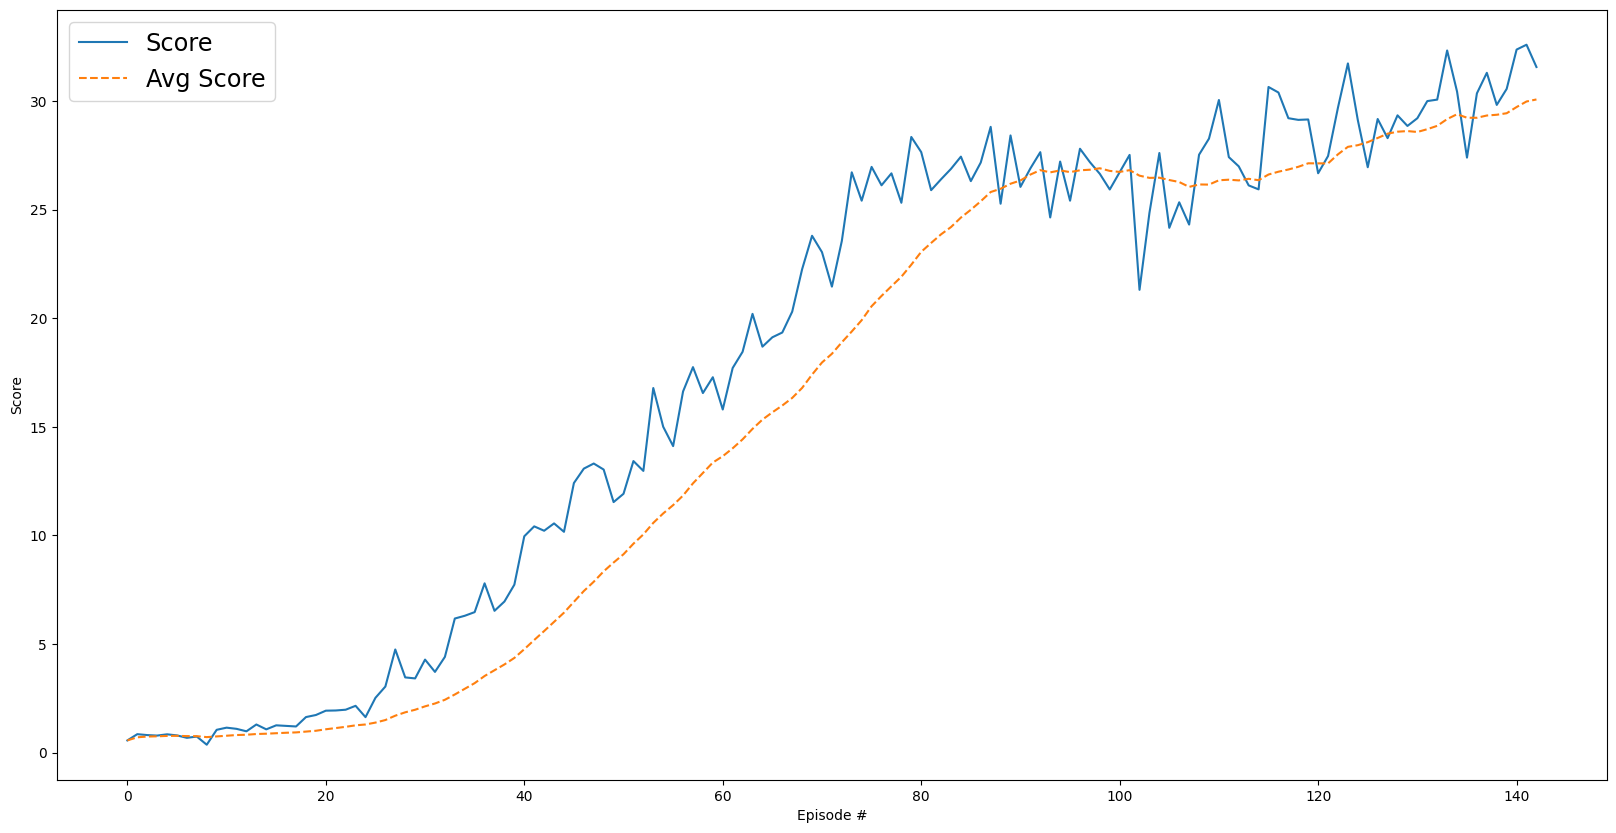

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(means)), means, linestyle='--')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(('Score', 'Avg Score'), fontsize='xx-large')
plt.show()

When finished, you can close the environment.

In [17]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 